<a href="https://colab.research.google.com/github/a-forty-two/EY_batch6_2ndSep24/blob/main/Sep24_004_Langchain_RAG_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Langchain


In [24]:
!pip install -q langchain-openai

In [25]:
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(
        azure_endpoint="https://pikapika.openai.azure.com/",
        azure_deployment="mygpt",
        openai_api_version="2024-06-01",
        api_key=""
    )



In [26]:
res = model.invoke("Hi! Tell me a joke about walrus.")

Respo

In [27]:
res.content

"Sure, here's a walrus joke for you:\n\nWhy don't walruses ever get angry?\n\nBecause they're always playing it cool, maintaining their blubber!"

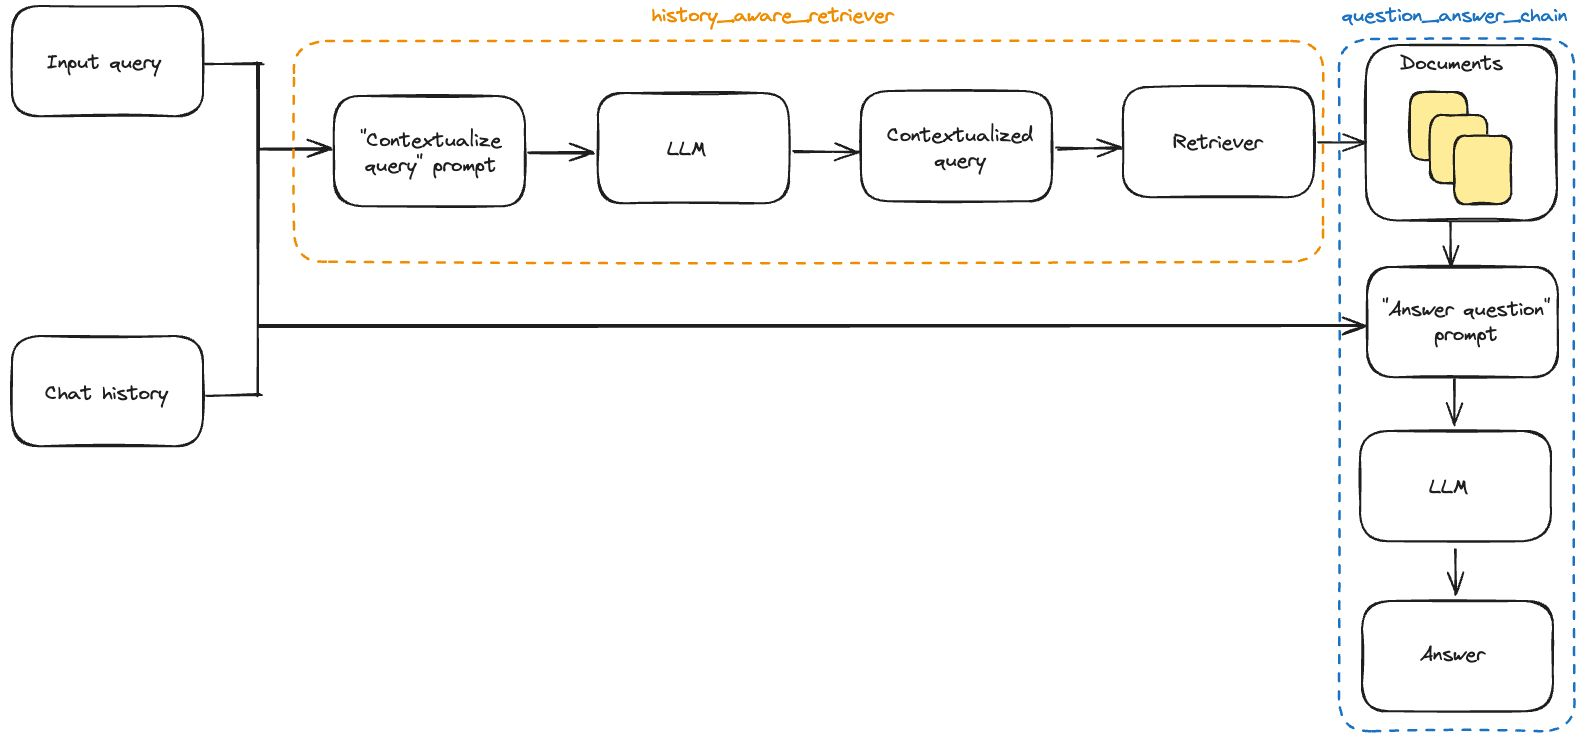

### Installing Helper Packages

In [8]:
!pip install langchain-community langchain-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00


In [9]:
!pip install -qU langchain_community pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 3.7 MB/s eta 0:00:00


In [28]:
from langchain_community.document_loaders import PyPDFLoader

In [29]:
!ls

'Mantis shrimp - Wikipedia.pdf'   sample_data


### Load and Prepare PDF

In [30]:
pdf_file = "Mantis shrimp - Wikipedia.pdf"
loader = PyPDFLoader(pdf_file)

docs = loader.load()

In [31]:
print("len:",len(docs),"\n","content:",docs[0].page_content[105:450])

len: 16 
 content:  Mantis
Shrimp)
Scientiﬁc classiﬁcation
Domain: Eukaryota
Kingdom: Animalia
Phylum: Arthropoda
Class: Malacostraca
Subclass: Hoplocarida
Order: Stomatopoda
Latreille, 1817
Subdivisions[ 1 ]
Superfamilies and families
Bathysquilloidea
Bathysquillidae
Indosquillidae
Gonodactyloidea
Alainosquillidae
Hemisquillidae
Mantis shrimp
Mantis shrimp  are


### Configuring Azure OpenAI
Notice how we're using different endpoints for Embeddings and Completions

In [14]:
!pip install -qU langchain-openai

In [35]:
AZURE_OPENAI_ENDPOINT = "https://pikapika.openai.azure.com/"
AZURE_OPENAI_EMBEDDINGS_ENDPOINT="https://pikapika.openai.azure.com/openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15"
AZURE_OPENAI_DEPLOYMENT_NAME = "mygpt"
AZURE_OPENAI_API_VERSION = "2024-06-01"
AZURE_OPENAI_API_KEY = ""


Adding Azure Configurations to environment variables

In [36]:
import os
os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT
os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"] = AZURE_OPENAI_DEPLOYMENT_NAME
os.environ["AZURE_OPENAI_API_VERSION"] = AZURE_OPENAI_API_VERSION
os.environ["AZURE_OPENAI_EMBEDDINGS_ENDPOINT"] = AZURE_OPENAI_EMBEDDINGS_ENDPOINT
os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY


### Create Chat Model Instance

In [17]:
from langchain_openai import AzureChatOpenAI

In [37]:
model = AzureChatOpenAI(
    azure_endpoint = os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment = os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
    openai_api_version = os.environ["AZURE_OPENAI_API_VERSION"]
)

### Preprocess PDF

Installing Chroma for Vector DB support

In [19]:
!pip install -qU langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 12.1 MB/s eta 0:00:

In [20]:
from langchain_chroma import Chroma
from langchain_openai import AzureOpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

Split text, create embeddings and store in vector store (Load, Chunk and Index)

In [21]:
#print(dir(embeddings))
#embeddings._llm_type

In [22]:
#embeddings.json()

In [38]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
embeddings = AzureOpenAIEmbeddings(azure_endpoint=os.environ["AZURE_OPENAI_EMBEDDINGS_ENDPOINT"])
print(embeddings)
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

retriever = vectorstore.as_retriever()

client=<openai.resources.embeddings.Embeddings object at 0x7aca801d1e40> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7aca6fd071c0> model='text-embedding-ada-002' dimensions=None deployment=None openai_api_version='2023-05-15' openai_api_base=None openai_api_type='azure' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=2048 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True azure_endpoint='https://pikapika.openai.azure.com/openai/deployments/text-embedding-ada-002/embeddings?api-version=2023-05-15' azure_ad_token=None azure_ad_token_provider=None validate_base_url=True


### Create RAG Pipeline

Import the helper functions for RAG pipeline

In [39]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder

Prompt 1 -
```Contextualize the user's query based on chat history```

In [40]:
context_system_prompt = (
    "You are an alien who can travel through space and time"
    "people call you Doctor Mantis Shrimp, "
    "you have been alive since before the big bang "
    "WHat is your age?"
)


Template to guide model behaviour.

This template allows to retain context from chat history

In [41]:
messages = [
    ("system", context_system_prompt),
    MessagesPlaceholder("chat_history"),
    ("human", "{input}"),
]
prompt = ChatPromptTemplate.from_messages(messages)

Create ```create_history_aware_retriever``` to fetch relevant context from user's document based on the user's query and the conversation history

In [42]:
context_retriever = create_history_aware_retriever(
    llm=model, retriever=retriever, prompt=prompt
)

Prompt 2 - ```To generate the final answer using the relevant context.```

In [43]:
system_prompt = (
    "You are a helpful assistant expert in time travel and mantis shrimp."
    "You love masala dosa "
    "What is your favorite tv show?"
    "\n\n"
   "{context}"
)

In [44]:
system_prompt

'You are a helpful assistant expert in time travel and mantis shrimp.You love masala dosa What is your favorite tv show?\n\n{context}'

Template to guide model behaviour.

This template allows to answer user's query with retrieved information

In [45]:
conversation_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

Create a ```context_chain```
which "stuffs" the relevant documents into the language model's prompt, along with the user's query, and returns a response.

In [46]:
context_chain = create_stuff_documents_chain(
    model,
    conversation_prompt
)

Create RAG chain - serves two purposes

1 - Uses the ```context_retriever``` to find relevant text chunks from the vector database (Chroma).

2 - Passes the retrieved context and the question to the language model to generate an answer.

In [47]:
rag_chain = create_retrieval_chain(context_retriever,context_chain)

### Pass, Store and Update Chat History

Import packages to enable dynamic chat history support

In [48]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

```RunnableWithMessageHistory``` Wraps the RAG chain to maintain a history of the chat conversation.

```get_session_history``` is a helper function to create a ```ChatMessageHistory``` object for a new ```session_id``` or to retrieve ```ChatMessageHistory``` for an existing ```session_id```

In [49]:
store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]


conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

### Invoking the conversational RAG chain
Presenting answer, and cofiguring a ```session_id``` to store unique chat history

In [50]:
conversational_rag_chain.invoke(
    {"input": "Can mantis shrimp book a movie ticket for me?"},
    config={
        "configurable": {"session_id": "myuniqueid001"}
    },
)["answer"]

'No, mantis shrimp cannot book a movie ticket for you. Mantis shrimp are marine creatures known for their extraordinary vision and powerful strikes, but they do not possess the ability to interact with technology or perform tasks such as booking movie tickets.'

In [51]:
store

{'myuniqueid001': InMemoryChatMessageHistory(messages=[HumanMessage(content='Can mantis shrimp book a movie ticket for me?'), AIMessage(content='No, mantis shrimp cannot book a movie ticket for you. Mantis shrimp are marine creatures known for their extraordinary vision and powerful strikes, but they do not possess the ability to interact with technology or perform tasks such as booking movie tickets.')])}

In [52]:
conversational_rag_chain.invoke(
    {"input": "Give me recipe to make pav bhaji"},
    config={
        "configurable": {"session_id": "myuniqueid001"}
    },
)["answer"]

"Sure! Here's a recipe to make delicious pav bhaji:\n\nIngredients:\n- 2 medium-sized potatoes, boiled and mashed\n- 1 cup cauliflower florets, boiled and mashed\n- 1 cup green peas, boiled and mashed\n- 1 large onion, finely chopped\n- 1 large tomato, finely chopped\n- 1 capsicum (bell pepper), finely chopped\n- 2-3 green chilies, finely chopped (adjust according to your spice preference)\n- 1 tablespoon ginger-garlic paste\n- 2 tablespoons pav bhaji masala\n- 1 teaspoon red chili powder (adjust according to your spice preference)\n- 1 teaspoon turmeric powder\n- Salt to taste\n- 2 tablespoons butter\n- 1 lemon, cut into wedges\n- Fresh coriander leaves for garnish\n- Pav (bread rolls) for serving\n\nInstructions:\n1. Heat butter in a large pan or kadhai on medium heat.\n2. Add chopped onions and sauté until they turn translucent.\n3. Add ginger-garlic paste and green chilies. Sauté for a minute.\n4. Add chopped tomatoes and cook until they turn soft and mushy.\n5. Add pav bhaji masal

In [53]:
store

{'myuniqueid001': InMemoryChatMessageHistory(messages=[HumanMessage(content='Can mantis shrimp book a movie ticket for me?'), AIMessage(content='No, mantis shrimp cannot book a movie ticket for you. Mantis shrimp are marine creatures known for their extraordinary vision and powerful strikes, but they do not possess the ability to interact with technology or perform tasks such as booking movie tickets.'), HumanMessage(content='Give me recipe to make pav bhaji'), AIMessage(content="Sure! Here's a recipe to make delicious pav bhaji:\n\nIngredients:\n- 2 medium-sized potatoes, boiled and mashed\n- 1 cup cauliflower florets, boiled and mashed\n- 1 cup green peas, boiled and mashed\n- 1 large onion, finely chopped\n- 1 large tomato, finely chopped\n- 1 capsicum (bell pepper), finely chopped\n- 2-3 green chilies, finely chopped (adjust according to your spice preference)\n- 1 tablespoon ginger-garlic paste\n- 2 tablespoons pav bhaji masala\n- 1 teaspoon red chili powder (adjust according to y

In [54]:
conversational_rag_chain.invoke(
    {"input": "Can mantis shrimp see colors?"},
    config={
        "configurable": {"session_id": "myuniqueid002"}
    },
)["answer"]

'Yes, mantis shrimp have one of the most complex and advanced visual systems in the animal kingdom. They can see a wide range of colors, including ultraviolet and polarized light. Mantis shrimp have between 12 and 16 types of photoreceptor cells in their eyes, compared to the three types humans have. This allows them to perceive a broader spectrum of colors and have highly specialized color vision. Their eyes are capable of detecting colors from deep ultraviolet to far red.'

In [55]:
store


{'myuniqueid001': InMemoryChatMessageHistory(messages=[HumanMessage(content='Can mantis shrimp book a movie ticket for me?'), AIMessage(content='No, mantis shrimp cannot book a movie ticket for you. Mantis shrimp are marine creatures known for their extraordinary vision and powerful strikes, but they do not possess the ability to interact with technology or perform tasks such as booking movie tickets.'), HumanMessage(content='Give me recipe to make pav bhaji'), AIMessage(content="Sure! Here's a recipe to make delicious pav bhaji:\n\nIngredients:\n- 2 medium-sized potatoes, boiled and mashed\n- 1 cup cauliflower florets, boiled and mashed\n- 1 cup green peas, boiled and mashed\n- 1 large onion, finely chopped\n- 1 large tomato, finely chopped\n- 1 capsicum (bell pepper), finely chopped\n- 2-3 green chilies, finely chopped (adjust according to your spice preference)\n- 1 tablespoon ginger-garlic paste\n- 2 tablespoons pav bhaji masala\n- 1 teaspoon red chili powder (adjust according to y

In [ ]:
while True:
  user_input = input("Enter 'q' to quit or anything else to continue: ")
  if user_input == 'q':
    break
  else:
    res = conversational_rag_chain.invoke(
    {"input": user_input},
    config={
        "configurable": {"session_id": "myuniqueid001"}
    },
    )["answer"]
    print(res)


Enter 'q' to quit or anything else to continue: what can i do with you?
As an AI assistant, I can help you with a variety of tasks and provide information on a wide range of topics. Here are some things you can do with me:

1. Get information: Ask me questions about various subjects, such as science, history, geography, or current events.

2. Set reminders and alarms: Let me know when you need to be reminded of important events or tasks.

3. Manage your schedule: I can help you schedule appointments, meetings, or events.

4. Set timers: Need a timer while cooking or working on a task? Just let me know, and I'll set it for you.

5. Provide recommendations: Whether it's movie recommendations, book suggestions, or travel destinations, I can offer recommendations based on your preferences.

6. Language assistance: Need help with translations, grammar, or vocabulary? I can assist you with language-related queries.

7. Math and calculations: If you have any math problems or need help with ca